In [261]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
plt.rcParams['font.family'] = 'Arial'
pd.set_option('display.float_format','{:.0f}'.format)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [3]:
%config InlineBackend.figure_format='retina'

In [31]:
d1 = pd.concat([
    pd.read_html("https://newportwhales.com/2017whalecount.html")[-1], 
    pd.read_html("https://newportwhales.com/2018whalecount.html")[-1],
    pd.read_html("https://newportwhales.com/2019whalecount.html")[-1],
    pd.read_html("https://newportwhales.com/2020whalecount.html")[-1],
    pd.read_html("https://newportwhales.com/2021whalecount.html")[-1],
    pd.read_html("https://newportwhales.com/2022whalecount.html")[-1]
], ignore_index=True)

In [32]:
d1

,DATE,MAMMALS VIEWED
0,12/31/2017,"11 Gray Whales, 100 Pacific Whitesided Dolphin"
1,12/30/2017,"3 Gray Whales, 400 Common Dolphin, 200 Pacific..."
2,12/29/2017,"6 Gray Whales, 250 Common Dolphin, 40 Pacific ..."
3,12/28/2017,"6 Gray Whales, 38 Pacific Whitesided Dolphin"
4,12/27/2017,"300 Common Dolphin, 40 Pacific Whitesided Dolphin"
...,...,...
2056,01/05/2022,"500 Common Dolphin, 40 Bottlenose Dolphin, 10 ..."
2057,01/04/2022,"5 Gray Whales, 30 Bottlenose Dolphin"
2058,01/03/2022,"1 Gray Whale, 200 Common Dolphin, 70 Bottlenos..."
2059,01/02/2022,"2 Gray Whales, 2 Fin Whales, 2,000 Common Dolp..."


In [33]:
d2 = d1[~d1['MAMMALS VIEWED'].str.contains('Bad Weather|Merry Christmas|Happy Thanksgiving', na=False)]

In [34]:
d3 = pd.concat([d2[['DATE']], d2['MAMMALS VIEWED'].str.replace(',' , "").str.split('(\d+)', expand=True)], axis=1)

In [35]:
d3.drop(columns=0, inplace=True)

In [71]:
d4 = pd.concat([d3[['DATE', 1, 2]].dropna(), d3[['DATE', 3, 4]].dropna().rename(columns={3:1, 4:2}), 
          d3[["DATE", 5, 6]].dropna().rename(columns={5:1, 6:2}), 
          d3[["DATE", 7, 8]].dropna().rename(columns={7:1, 8:2}), 
          d3[["DATE", 9, 10]].dropna().rename(columns={9:1, 10:2}), 
          d3[["DATE", 11, 12]].dropna().rename(columns={11:1, 12:2}), 
          d3[["DATE", 13, 14]].dropna().rename(columns={13:1, 14:2}), 
          d3[["DATE", 15, 16]].dropna().rename(columns={15:1, 16:2})]).rename(columns={1:'Count', 2:'Species'})

In [225]:
d4['DATE'] = pd.to_datetime(d4['DATE'])
d4['Mammal'] = d4['Species'].str.split().str[-1]
d4['Species'] = d4['Species'].str.strip()
d4['Type'] = d4.Species.str.rsplit(' ',1).str[0]
d4['Mammal'] = d4['Mammal'].replace({'Dolphins': 'Dolphin', 'Whales':'Whale'})
d4.replace({'Grey':'Gray', 'Humback':'Humpback', 'Finback':'Fin', 'Brydes':"Bryde's", "Byrde's":"Bryde's"}, inplace=True)

C:\Users\abhishek.bhansali\AppData\Local\Temp\ipykernel_4432\1682385517.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  d4['Type'] = d4.Species.str.rsplit(' ',1).str[0]


In [226]:
d4['Count'] = d4['Count'].astype(np.int64)

In [227]:
d4['Week'] = d4['DATE'].dt.isocalendar().week
d4['Month'] = d4['DATE'].dt.month
d4['Year'] = d4['DATE'].dt.year

In [228]:
d_whale = d4[d4['Mammal'] == 'Whale']

In [249]:
(d_whale.groupby(['Month','Type'])[['Count']].sum()
               .pivot_table(index='Month', columns='Type')).fillna('-')

Count                                                       
Type   Blue Bryde's False Killer Fin Gray Humpback Minke Sei Sperm
Month                                                             
1         -       -            -  93  485      175     2   -     -
2         -       -            -  40 1157      115     3   -     -
3         9       3           65  30 3787      146     3   -     -
4       144       1           80 215 1662       48     6   -     -
5       326       -            - 307  161       60    14   -     -
6       444       5            -  96   12      428   244   -     -
7       345      46            -  28   19      250   277   4     -
8       152      36            -   8    5      155   120   5     -
9        38      29            -  20    1       73    57   2     -
10        5      12            -  49    4      298    68   -     1
11        6       6            -  54    2      120    35   -     -
12        -       -            -  39  115      123    12   -     -

In [274]:
d_whale_year = d_whale.groupby(['Year', 
                 'Type'])[['Count']].sum().pivot_table(index='Year',
                                                       columns='Type').fillna('-')

In [283]:
d_whale_year

Count                                                       
Type  Blue Bryde's False Killer Fin Gray Humpback Minke Sei Sperm
Year                                                             
2017   131       1            - 105 1495      474    64   9     -
2018   553      46            - 118 1748      297   196   -     -
2019   532      16           80 384 1689      362   247   2     -
2020     8      41            -  31  655      550   172   -     -
2021    98      29           65 182 1141      179    89   -     1
2022   147       5            - 159  682      129    73   -     -

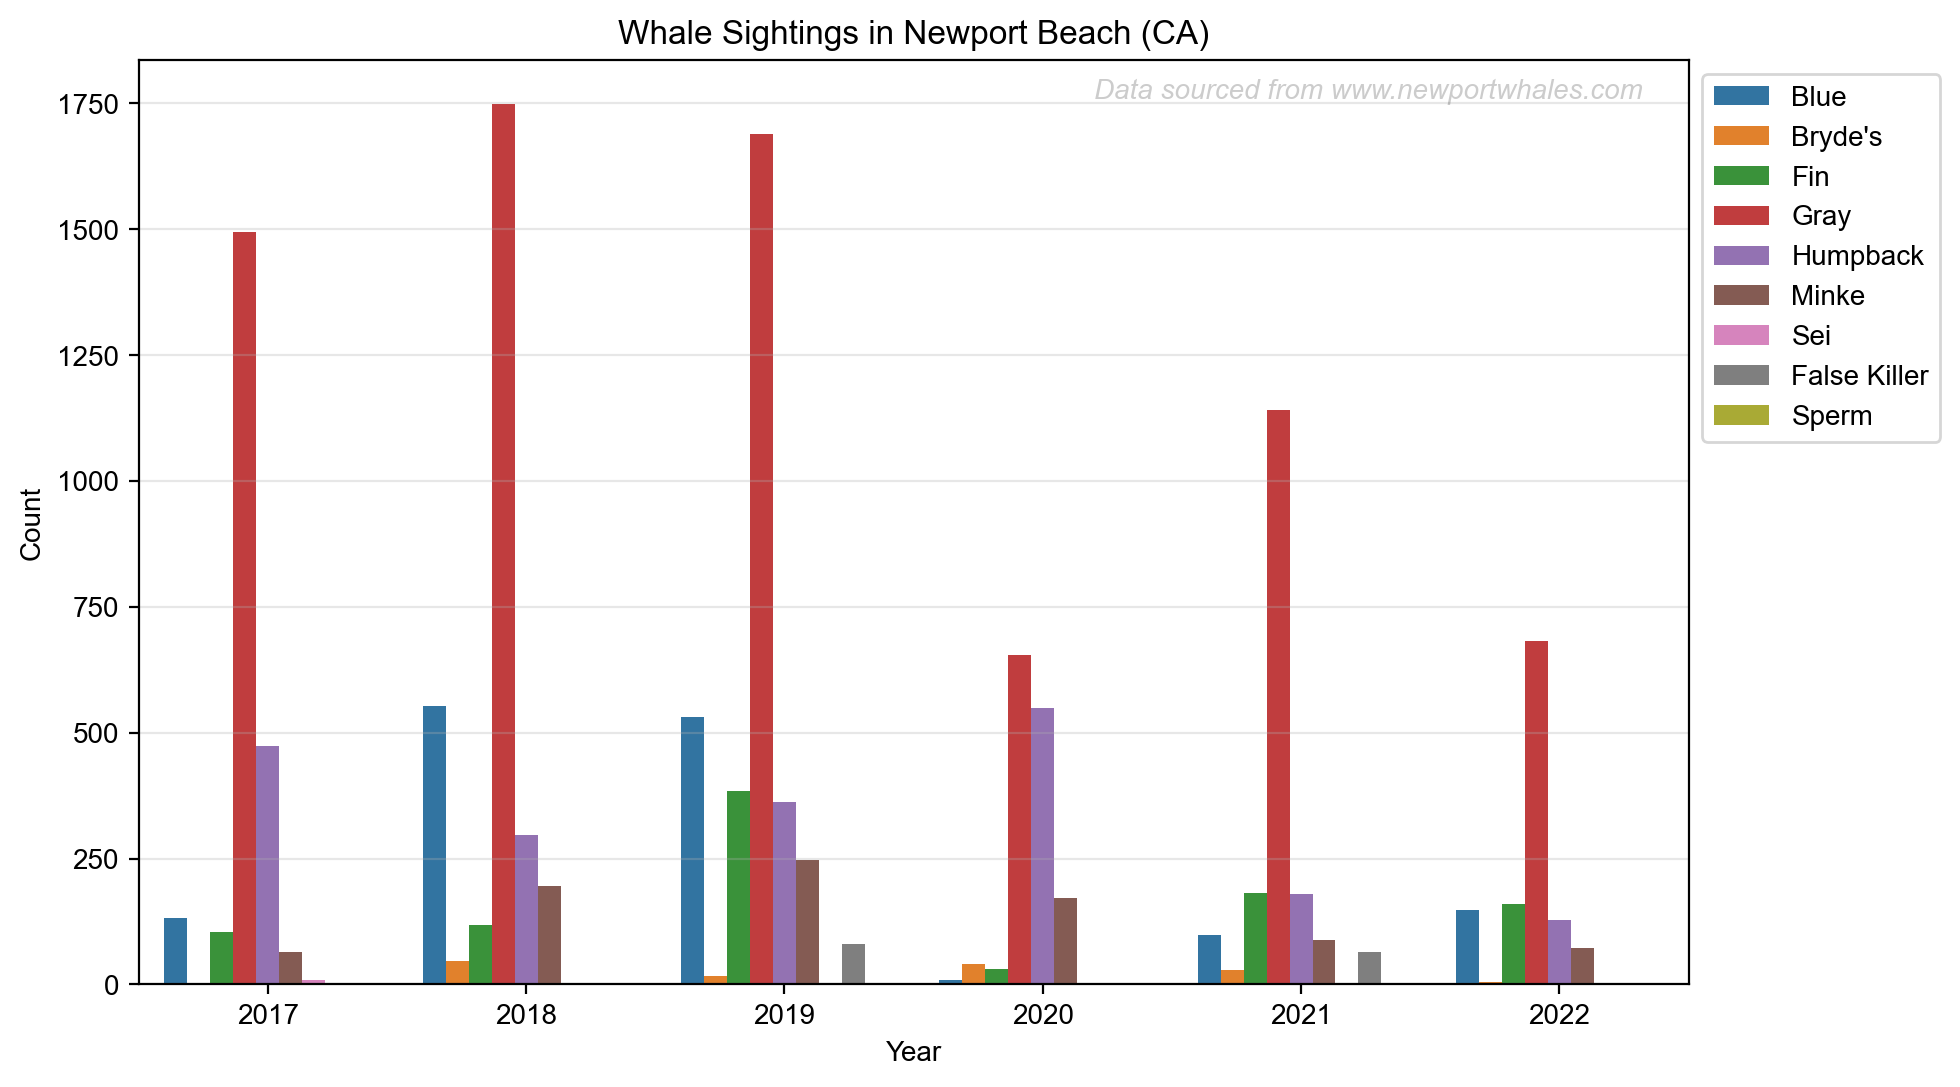

In [294]:
fig, ax = plt.subplots(figsize=(10, 6))
_= sns.barplot(x='Year', y='Count', hue='Type', data=d_whale.groupby(['Year', 'Type'])[['Count']].sum().reset_index())
_= ax.legend(bbox_to_anchor=(1,1))
_= ax.set(title='Whale Sightings in Newport Beach (CA)')
_= ax.text(x=3.2, y=1760, s='Data sourced from www.newportwhales.com', alpha=0.2, style='italic')